# **K-Nearest Neighbours**

**Objective:**
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo (2).csv


# Step 1: Analyze the Data Using Visualizations

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


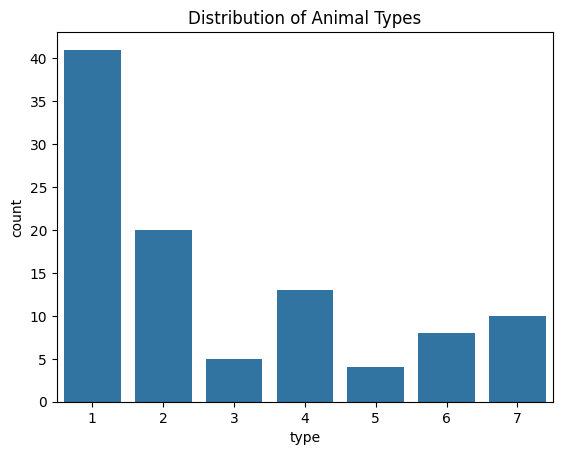

In [ ]:
#Visualization to understand the distribution of different animal types and their features.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Reading the dataset
df=pd.read_csv('Zoo.csv')
# Display the first few rows of the dataset
print(df.head())

# Visualize the distribution of animal types
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

In [ ]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
#Dataset doesnt having any missing values so ,we finding Outliers and remove here
# separating numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
#Calculating Quantiles
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
df2 = numeric_df[~((numeric_df > upper_bound) | (numeric_df < lower_bound)).any(axis=1)]
df1 = df.loc[df.index] # Align using index to keep 'animal name' column

# Print the shape of the new DataFrame
print(df1.shape)


(101, 18)


In [ ]:
df1

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Step 3: Split the Dataset

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0


In [ ]:
# We will split the dataset into training and testing sets (80% training, 20% testing).
!pip install scikit-learn -U
from sklearn.model_selection import train_test_split

# Define features and target variable
y = df1['type']
X = df1.drop(columns=['type'])

# Perform one-hot encoding on categorical features
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder()
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling Imbalance data using Smote
from imblearn.over_sampling import SMOTE

# Before applying SMOTE, find the size of the smallest minority class
from collections import Counter
minority_class_size = min(Counter(y_train).values())

# Set k_neighbors to be one less than the minority class size, or 1 if the minority class size is 1
k_neighbors_value = min(minority_class_size - 1, 3) # Using min to ensure k_neighbors is not negative
k_neighbors_value = max(k_neighbors_value, 1)  # Ensure k_neighbors is at least 1

smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of k values to explore
k_values = list(range(1, 31))

# Store accuracy and F1-score for each k
accuracies = []
f1_scores = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_resampled, y_train_resampled)  # Fit the model
    y_pred = knn.predict(X_test)  # Make predictions

#Step 4: Implement K-Nearest Neighbours
#    Step 5: Choose Distance Metric and Value for K

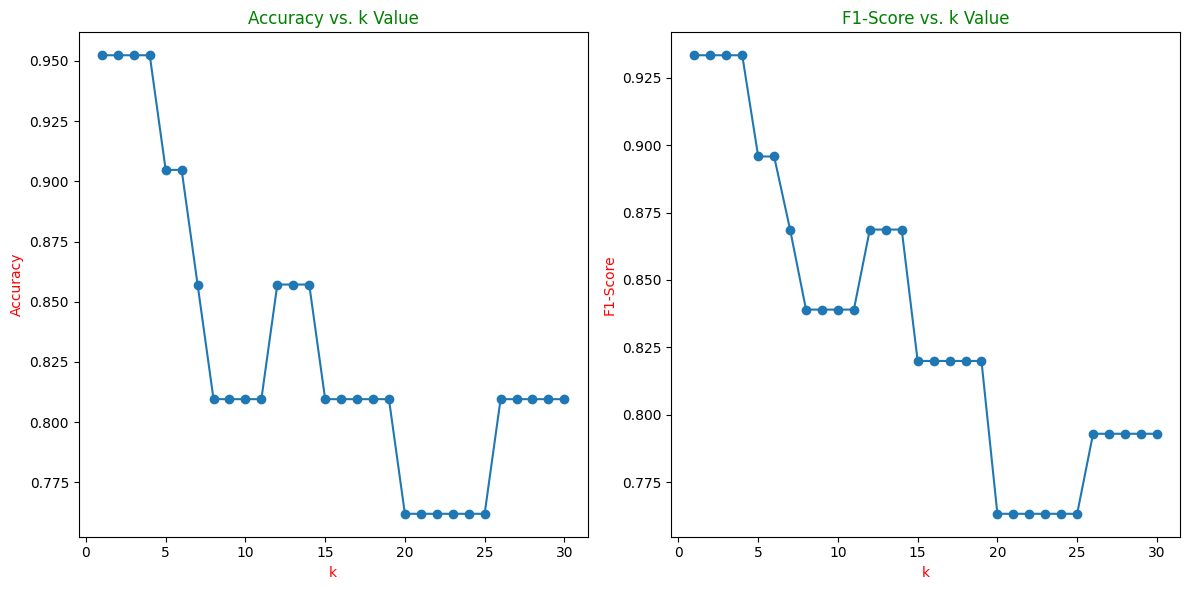


Optimal k value: 1


In [ ]:
## The default distance metric in KNN is Euclidean distance.
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of k values to explore
k_values = list(range(1, 31))

# Store accuracy and F1-score for each k
accuracies = []
f1_scores = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize KNN with current k
    knn.fit(X_train_resampled, y_train_resampled)  # Fit the model
    y_pred = knn.predict(X_test)  # Make predictions
 # Calculate accuracy and F1-score
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot accuracy and F1-score against k values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value',color='green')
plt.xlabel('k',color='red')
plt.ylabel('Accuracy',color='red')

plt.subplot(1, 2, 2)
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Score vs. k Value',color='green')
plt.xlabel('k',color='red')
plt.ylabel('F1-Score',color='red')

plt.tight_layout()
plt.show()

# Find optimal k based on F1-score
optimal_k = k_values[np.argmax(f1_scores)]
print(f"\nOptimal k value: {optimal_k}")

# Step 6: Evaluate Classifier's Performance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1 Score: 0.79


# Step 7: Visualize Decision Boundaries

In [ ]:
!pip install mlxtend

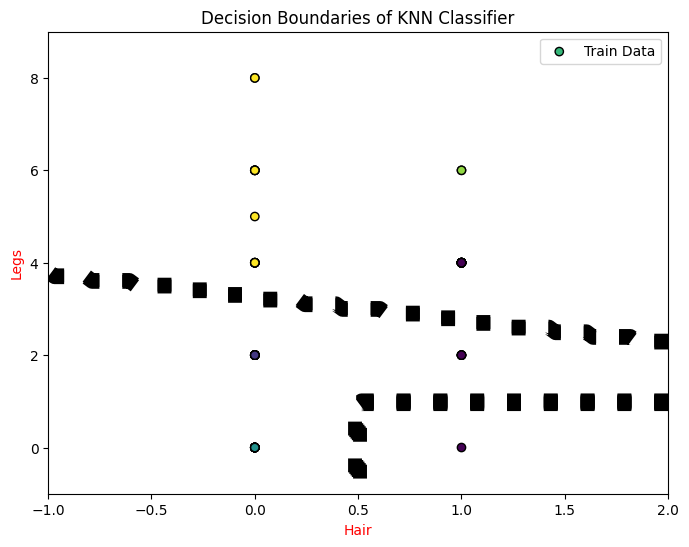

In [ ]:
# To visualize decision boundaries, we will use a 2D plot. For simplicity, we will use only two features for visualization.
import numpy as np
import matplotlib.pyplot as plt

# For visualization, we will use only two features
X_vis = X[['hair', 'legs']]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Fit the KNN model on the reduced dataset
knn.fit(X_train_vis, y_train_vis)

# Create a contour plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train_vis['hair'], X_train_vis['legs'], c=y_train_vis, edgecolor='k', marker='o', label='Train Data')

# Create a contour plot of the decision boundaries
x_min, x_max = X_vis['hair'].min() - 1, X_vis['hair'].max() + 1
y_min, y_max = X_vis['legs'].min() - 1, X_vis['legs'].max() + 1
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', linestyles=':', linewidths=10,linecolor='red')
plt.title('Decision Boundaries of KNN Classifier')
plt.xlabel('Hair',color='red')
plt.ylabel('Legs',color='red')
plt.legend()
plt.show()

# **Interview Questions**

**1. What are the key hyperparameters in KNN?**

**Key Hyperparameters in KNN:**

**n_neighbors:** Number of nearest neighbors to consider.

**weights:** Determines how neighbors influence predictions (uniform or distance-based).

**algorithm:** Method for finding neighbors (e.g., auto, ball_tree).

**leaf_size:** Affects the efficiency of tree-based algorithms.

**metric:** Distance measure used (e.g., Euclidean, Manhattan).


---



2**. What distance metrics can be used in KNN?**

**Distance Metrics in KNN:**

**Euclidean Distance:** Straight-line distance between points.

**Manhattan Distance:** Sum of absolute differences.

**Minkowski Distance:** Generalized distance with parameter ( p ).

**Hamming Distance:** Measures differing elements for categorical data.

**Cosine Similarity:** Measures angle between vectors.